<a href="https://colab.research.google.com/github/ozgursobe/btc_prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4115    0  4115    0     0   9366      0 --:--:-- --:--:-- --:--:--  9352
100  517k  100  517k    0     0   455k      0  0:00:01  0:00:01 --:--:--  455k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4075    0  4075    0     0  18215      0 --:--:-- --:--:-- --:--:-- 18191
100  392k  100  392k    0     0   426k      0 --:--:-- --:--:-- --:--:--  426k


In [47]:
import talib
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("btc_data.csv")
df.head(4)
df = df.drop(["tradecount", "Volume USDT"], axis=1)
df.sort_values("Date", inplace=True)
df
df["target"] = (df['Close'].shift(-1) - df['Close'] > 0).astype(int)
df

EMA3 = talib.EMA(df["Close"], 3)
df["EMA3"] =EMA3
df["EMA3_UP"] =(df["Close"] >  EMA3).astype(int)

EMA6 = talib.EMA(df["Close"], 6)
df["EMA6"] = EMA6
df["EMA6_UP"] =(df["Close"] >  EMA6).astype(int)

EMA15 = talib.EMA(df["Close"], 15)
df["EMA15"] = EMA15
df["EMA15_UP"] =(df["Close"] >  EMA15).astype(int)

EMA30 = talib.EMA(df["Close"], 30)
df["EMA30"] = EMA30
df["EMA30_UP"] =(df["Close"] >  EMA30).astype(int)

MACD, MACD_SIGNAL, MACD_HIST = talib.MACD(df["Close"])
df["MACD"] = MACD
df["MACD_SIGNAL"] = MACD_SIGNAL
df["MACD_UP"] = (abs(MACD) > abs(MACD_SIGNAL)).astype(int)
df["MACD_HIST"] = MACD_HIST

RSI = talib.RSI(df["Close"])
STOCHRSI_FAST_K,STOCHRSI_FAST_D  = talib.STOCHRSI(df["Close"])
MOMENTUM = talib.MOM(df["Close"])
TRIMA = talib.TRIMA(df["Close"])

df["RSI"] = RSI
df["STOCHRSI_FAST_K"] = STOCHRSI_FAST_K
df["STOCHRSI_FAST_D"] = STOCHRSI_FAST_D
df["MOMENTUM"] = MOMENTUM
df["TRIMA"] = TRIMA
df["TRIMA_UP"] = (df["Close"] > TRIMA).astype(int)
df["RSI_Change"] = df["RSI"].diff()
df["MACD_HIST_Gradient"] = df["MACD_HIST"].diff()
df = df[33:]
df



,Date,Symbol,Open,High,Low,Close,Volume BTC,target,EMA3,EMA3_UP,...,MACD_UP,MACD_HIST,RSI,STOCHRSI_FAST_K,STOCHRSI_FAST_D,MOMENTUM,TRIMA,TRIMA_UP,RSI_Change,MACD_HIST_Gradient
53954,2017-08-18 13:00:00,BTCUSDT,4302.97,4318.16,4221.05,4293.09,46.533767,0,4312.808119,0,...,0,12.774587,48.125539,0.000000,4.540717e+01,0.70,4320.167750,0,-5.362132,NaN
53953,2017-08-18 14:00:00,BTCUSDT,4293.09,4293.09,4193.70,4259.40,74.368943,0,4286.104059,0,...,0,8.059032,43.983214,0.000000,2.043558e+01,-28.52,4315.214125,0,-4.142325,-4.715555
53952,2017-08-18 15:00:00,BTCUSDT,4259.40,4259.40,4200.00,4236.89,39.947717,1,4261.497030,0,...,0,3.511160,41.418037,0.000000,-1.421085e-14,-76.67,4310.368708,0,-2.565177,-4.547873
53951,2017-08-18 16:00:00,BTCUSDT,4234.54,4283.79,4234.54,4250.34,45.038824,0,4255.918515,0,...,0,1.593674,43.537011,17.556241,5.852080e+00,-29.12,4306.207542,0,2.118974,-1.917485
53950,2017-08-18 17:00:00,BTCUSDT,4250.34,4250.34,4066.53,4193.35,62.691466,0,4224.634257,0,...,1,-3.073566,37.369133,0.000000,5.852080e+00,-106.90,4302.638750,0,-6.167879,-4.667240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-10-19 19:00:00,BTCUSDT,28646.98,28765.76,28645.00,28750.75,1039.209350,0,28683.487102,1,...,1,33.296332,67.729901,81.852091,4.187447e+01,350.74,28349.628042,1,4.427947,3.876387
3,2023-10-19 20:00:00,BTCUSDT,28750.75,28882.07,28684.80,28715.38,1737.147110,0,28699.433551,1,...,1,31.213093,64.857358,69.919143,6.518085e+01,238.39,28365.076792,1,-2.872544,-2.083239
2,2023-10-19 21:00:00,BTCUSDT,28715.39,28739.73,28604.09,28604.09,1118.516970,1,28651.761775,0,...,1,20.587505,56.707789,0.000000,5.059041e+01,153.40,28381.901333,1,-8.149569,-10.625588
1,2023-10-19 22:00:00,BTCUSDT,28604.09,28704.99,28598.60,28649.65,767.855180,1,28650.705888,0,...,1,15.127626,58.980171,20.616581,3.017857e+01,172.53,28399.634917,1,2.272383,-5.459878


In [48]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ["MACD_HIST","RSI","STOCHRSI_FAST_D","MOMENTUM"]
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[features_to_scale])
df[features_to_scale] = scaled_features

df = df[34:]

train = train = df[:-10000]
test = df[-10000:]





In [49]:
# Logistic Regression Model
LOG_predictors = ["EMA3_UP", "MACD_UP", "MACD_HIST", "TRIMA_UP", "RSI_Change","MACD_HIST_Gradient"]
log = LogisticRegression()
model_LOG = log.fit(train[LOG_predictors], train["target"])

model_LOG.score(test[LOG_predictors], test["target"])

0.5537

In [50]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
FOREST_predictors = ["EMA3_UP","EMA6_UP", "MACD_UP", "MACD_HIST", "TRIMA_UP","RSI", "RSI_Change","MACD_HIST_Gradient","MOMENTUM", "EMA15_UP", "EMA30_UP","TRIMA"]
rforest = RandomForestClassifier(n_estimators=100,random_state=1, min_samples_split=5,max_depth=5)
model_forest = rforest.fit(train[FOREST_predictors], train["target"])
model_forest.score(test[FOREST_predictors], test["target"])


0.556

In [51]:
# XGBoost
import xgboost as xgb
XGB_predictors = ["EMA3_UP", "MACD_HIST", "TRIMA_UP","RSI", "RSI_Change","MACD_HIST_Gradient","MOMENTUM"]
xgb = xgb.XGBClassifier(random_state = 1, max_depth =1, learning_rate=0.1, )
model_xgb = xgb.fit(train[XGB_predictors], train["target"])
model_xgb.score(test[XGB_predictors], test["target"])


0.5532

In [52]:
# Support Vector Classification Model
from sklearn.svm import SVC
SVM_predictors = ["EMA3_UP", "EMA6_UP", "TRIMA_UP", "RSI_Change",]
SVM = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1)

model_SVM = SVM.fit(train[SVM_predictors], train["target"])
model_SVM.score(test[SVM_predictors], test["target"])


0.5549

In [54]:
# LSTM model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalization
numerical_cols = ["EMA3_UP", "EMA6_UP", "TRIMA_UP", "RSI_Change","MACD_HIST_Gradient", "MACD_HIST", "MOMENTUM"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



<ipython-input-54-cd0dadc0f1fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [55]:
import numpy as np

# Zaman penceresi boyutu (son N saat)
sequence_length = 60

# Giriş ve çıkış verilerini oluştur
X = []
y = []

for i in range(sequence_length, len(df)):
    X.append(df[numerical_cols].iloc[i-sequence_length:i].values)  # Son N saatin verisi
    y.append(df['target'].iloc[i])  # Bir sonraki günün hedefi

# X ve y'yi numpy array'e dönüştür
X = np.array(X)
y = np.array(y)

# Verinin boyutlarına bakalım
print(X.shape, y.shape)

(53861, 60, 7) (53861,)


In [56]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verisine ayır
# Zaman serisi verilerinde sırayı bozmamak için shuffle=False kullanılır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Boyutları kontrol edelim
print(X_train)


[[[1.         1.         1.         ... 0.53487838 0.54626812 0.5986219 ]
  [0.         0.         1.         ... 0.52449831 0.54392988 0.5941864 ]
  [0.         0.         1.         ... 0.5249792  0.54176629 0.59943421]
  ...
  [1.         1.         0.         ... 0.54634002 0.522977   0.57135214]
  [1.         1.         0.         ... 0.55781714 0.53273926 0.58200017]
  [1.         1.         0.         ... 0.54071043 0.53628882 0.59500343]]

 [[0.         0.         1.         ... 0.52449831 0.54392988 0.5941864 ]
  [0.         0.         1.         ... 0.5249792  0.54176629 0.59943421]
  [1.         1.         1.         ... 0.53163894 0.54202134 0.60055055]
  ...
  [1.         1.         0.         ... 0.55781714 0.53273926 0.58200017]
  [1.         1.         0.         ... 0.54071043 0.53628882 0.59500343]
  [1.         1.         0.         ... 0.54052959 0.53977271 0.60383357]]

 [[0.         0.         1.         ... 0.5249792  0.54176629 0.59943421]
  [1.         1.      

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Modeli oluştur
model = Sequential()

# LSTM katmanı
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout katmanı

# Bir başka LSTM katmanı
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout katmanı

# Çıkış katmanı
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid çünkü çıktı 0 veya 1 olacak

# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modelin özetini al
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 60, 50)              │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Modeli eğit
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Eğitimi görselleştirelim
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Test Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


Epoch 1/5
 114/1347 ━━━━━━━━━━━━━━━━━━━━ 1:18 63ms/step - accuracy: 0.4930 - loss: 0.6963


KeyboardInterrupt



In [42]:
# Test doğruluğunu hesapla
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Kaybı: {test_loss}")
print(f"Test Doğruluğu: {test_accuracy}")


337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5345 - loss: 0.6906
Test Kaybı: 0.6903599500656128
Test Doğruluğu: 0.5367121696472168


In [43]:
# LSTM + CNN model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Flatten, Dropout, BatchNormalization

# Giriş boyutları
time_steps = 60  # Zaman adımları (örneğin 60 saat)
features = 7    # Özellik sayısı (örneğin RSI, EMA vb.)

# Giriş katmanı
input_layer = Input(shape=(time_steps, features))

# CNN Katmanı
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = Dropout(0.2)(conv1)

# LSTM Katmanı
lstm_layer = LSTM(50, return_sequences=False)(conv1)

# Yoğun Katman (Çıkış için)
dense1 = Dense(64, activation='relu')(lstm_layer)
dense1 = Dropout(0.3)(dense1)
output_layer = Dense(1, activation='sigmoid')(dense1)  # Binary classification için sigmoid

# Modeli birleştir
model = Model(inputs=input_layer, outputs=output_layer)

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Özeti
model.summary()


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 60, 7)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 60, 32)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,761 (81.10 KB)

 Trainable params: 20,697 (80.85 KB)

 Non-trainable params: 64 (256.00 B)

In [44]:
# Modeli eğit
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.5072 - loss: 0.6948 - val_accuracy: 0.5158 - val_loss: 0.6921
Epoch 2/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - accuracy: 0.5261 - loss: 0.6919 - val_accuracy: 0.5191 - val_loss: 0.6915
Epoch 3/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5211 - loss: 0.6921 - val_accuracy: 0.5298 - val_loss: 0.6910
Epoch 4/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.5237 - loss: 0.6923 - val_accuracy: 0.5367 - val_loss: 0.6908
Epoch 5/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5246 - loss: 0.6916 - val_accuracy: 0.5364 - val_loss: 0.6904


In [45]:
# Doğrulama verisi performansı
val_loss, val_accuracy = model.evaluate(X_train, y_train)
print(f"Doğrulama Seti - Kayıp: {val_loss}, Doğruluk: {val_accuracy}")

# Test verisi performansı
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Seti - Kayıp: {test_loss}, Doğruluk: {test_accuracy}")


1347/1347 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5264 - loss: 0.6911
Doğrulama Seti - Kayıp: 0.6911565661430359, Doğruluk: 0.5282677412033081
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5351 - loss: 0.6908
Test Seti - Kayıp: 0.6904407739639282, Doğruluk: 0.5364336967468262


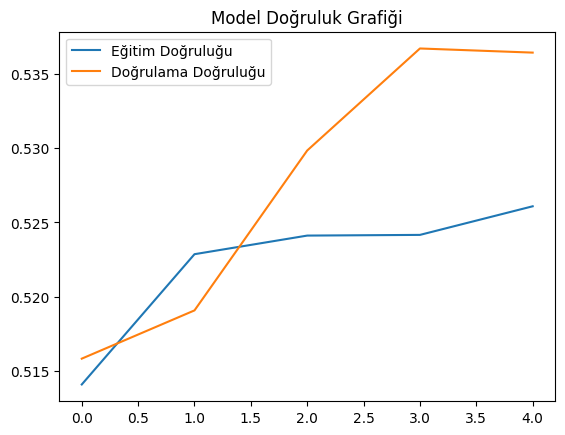

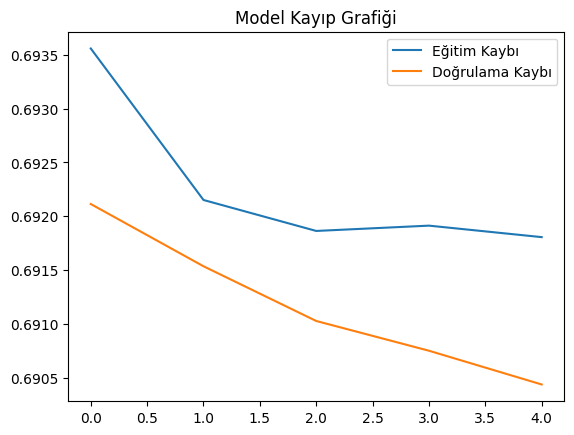

In [46]:
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Model Doğruluk Grafiği')
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title('Model Kayıp Grafiği')
plt.show()
